In [580]:
import itertools
import numpy as np
import matplotlib.pyplot as mpl
from random import random
import math
import pandas as pd

# Funcion Logistica

In [583]:
eps = np.finfo(float).eps
eps=2.718281828459045235360287471352662497757247093699959574

def sigmo(z):
    #print("sigmo: ", z[0])
    return (1/(1+eps**(-z[0])))

# Prediccion

In [584]:
def calc(x, theta):
    suma = 0
    #print("x: ", x)
    for j in range(x.shape[0]):
        suma+=x[j]*theta[j]
    return suma

def predict(x, theta):
    y2 = []
    for i in range(x.shape[0]):
        #print(theta)
        y2.append(sigmo(calc(x[i,:], theta)))
    return y2

# Gradiente

In [585]:
def gradiente(X,Y,theta,alpha, num_iter):
    for i in range(num_iter):
        h_theta = (np.dot(X,theta) - Y)
        tmp = h_theta * X
        gamma =  np.sum(tmp, axis=0).reshape(theta.shape[0],1)
        theta = theta - ((alpha/X.shape[0]) * gamma)
    
    return theta

# Funcion Costo

In [586]:
def logistic_cost(y2, y):
    cost = 0
    for i in range (len(y)):
        ycal=y2[i]
        #print("ycal=", ycal, " y=", y[i][0])
        cost+=(y[i][0]*np.log(ycal))+((1-y[i][0])*np.log(1-ycal))
    
    return cost/(-len(y))


# Cargar los datos

In [587]:
def get_y(y):
    y=np.array(y)
    y=y.reshape(len(y),1)
    return y

In [589]:
y=[0,0,2,0,1,0,2,2,1,0,2,0,1,2,2,2,1,1]
size=18

#gana
y_gana=  [0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0]
y_empata=[0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1]
y_pierde=[1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0]

y_gana = get_y(y_gana)
y_empata = get_y(y_empata)
y_pierde = get_y(y_pierde)


X= np.ones((size,8))
X[:,1] =np.arange(1,size+1) 
X[:,2] =[27.1,27.1,27.6,27.2,28.0,26.4,26.1,25.7,25.9,26.6,26,26.7,26.3,26,26.3,26.8,26.28,25.9]
X[:,3] =[26.5,28.22,28.23,26.4,24.6,28.4,26.9,27.9,28.1,29.6,26.4,26,24.7,28.7,26.9,27.9,28.4,27.3]

X[:,4] =[20,22,23,28,30,25,18,21,20,16,27,23,25,29,19,21,25,19] 

X[:,5] =[53,3,3,8,3,43,3640,3,3,570,43,3,67,3,3,2850,25,3]

X[:,6] =[46788,50000,50000,60000,50000,60235,45000,50000,50000,48665,42354,50000,51796,50000,40093,35742,
         49000,50000]

#x[:,7] =[-1,1,1,-1,1,-1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,1] 
X[:,7] =[0.3,0.7,0.7,0.3,0.7,0.3,0.4,0.7,0.7,0.3,0.3,0.7,0.3,0.7,0.7,0.3,0.3,0.3] 


In [590]:
#entre 0-1
def normalized(array, size):
    new_array=np.zeros(size)
    _min=np.min(array)
    _max=np.max(array)
    minmax=_max-_min
    for i in range (0,len(array)):
        new_array[i]=(array[i]-_min)/minmax
    
    return new_array            

for i in range (2,7):
    X[:,i]= normalized(X[:,i], size)
print(X)

[[1.00000000e+00 1.00000000e+00 6.08695652e-01 3.80000000e-01
  2.85714286e-01 1.37475942e-02 4.50985996e-01 3.00000000e-01]
 [1.00000000e+00 2.00000000e+00 6.08695652e-01 7.24000000e-01
  4.28571429e-01 0.00000000e+00 5.82125505e-01 7.00000000e-01]
 [1.00000000e+00 3.00000000e+00 8.26086957e-01 7.26000000e-01
  5.00000000e-01 0.00000000e+00 5.82125505e-01 7.00000000e-01]
 [1.00000000e+00 4.00000000e+00 6.52173913e-01 3.60000000e-01
  8.57142857e-01 1.37475942e-03 9.90405422e-01 3.00000000e-01]
 [1.00000000e+00 5.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 5.82125505e-01 7.00000000e-01]
 [1.00000000e+00 6.00000000e+00 3.04347826e-01 7.60000000e-01
  6.42857143e-01 1.09980753e-02 1.00000000e+00 3.00000000e-01]
 [1.00000000e+00 7.00000000e+00 1.73913043e-01 4.60000000e-01
  1.42857143e-01 1.00000000e+00 3.77985547e-01 4.00000000e-01]
 [1.00000000e+00 8.00000000e+00 0.00000000e+00 6.60000000e-01
  3.57142857e-01 0.00000000e+00 5.82125505e-01 7.00000000e-01]


In [591]:
theta_gana = np.zeros((8,1))
theta_empata = np.zeros((8,1))
theta_pierde = np.zeros((8,1))

In [592]:
#Calcular theta si gana
theta_gana = gradienteV(X,y_gana,theta_,0.001,100000)
print(theta_gana)

#Calcular theta si empata
theta_empata = gradienteV(X,y_empata,theta_,0.001,100000)
print(theta_empata)

#Calcular theta si pierde
theta_pierde = gradienteV(X,y_pierde,theta_,0.001,100000)
print(theta_pierde)

[[ 0.42296813]
 [-0.02045508]
 [-0.65566486]
 [ 0.41589036]
 [ 0.76340934]
 [ 0.63269715]
 [-1.16957475]
 [ 0.74940646]]
[[-0.09329961]
 [ 0.04952423]
 [ 0.21685133]
 [-0.63216259]
 [-0.23737787]
 [-0.27074779]
 [ 0.58743893]
 [-0.01737538]]
[[ 0.46032469]
 [-0.02384753]
 [ 0.51029427]
 [ 0.24392845]
 [-0.53042259]
 [-0.2903203 ]
 [ 0.70440757]
 [-0.63785596]]


In [593]:
def predict_mult(X, thetha_gana, theta_pierde, thetha_empata):
    y_pred_gana=predict(X,theta_gana)
    y_pred_empata=predict(X,theta_empata)
    y_pred_pierde=predict(X,theta_pierde)
    res=[]
    print(y_pred_gana)
    print(y_pred_empata)
    print(y_pred_pierde)
    for i in range(len(y_pred_gana)):
        print(y_pred_gana[i],"", y_pred_empata[i],"", y_pred_pierde[i])
        if (y_pred_gana[i]>y_pred_empata[i] and y_pred_gana[i]>y_pred_pierde[i]):
            print("gana")
            res.append(2)
        elif (y_pred_empata[i]>y_pred_gana[i] and y_pred_empata[i]>y_pred_pierde[i]):
            print("empata")
            res.append(1)
        elif (y_pred_pierde[i]>y_pred_empata[i] and y_pred_pierde[i]>y_pred_gana[i]):
            print("pierde")
            res.append(0)
    return res

y_values_calc=predict_mult(X, theta_gana, theta_pierde, theta_empata)

[0.5213934690079218, 0.6118233060491182, 0.585975538911715, 0.44644379973989456, 0.5676286070400781, 0.4924338071064489, 0.7224203618478134, 0.6570570021050132, 0.630612068279939, 0.5210150991763253, 0.6852556121886406, 0.5583170466247401, 0.4886131388852581, 0.7200542851470608, 0.6494936873140827, 0.7406465047857421, 0.5774444081592286, 0.48248553611352196]
[0.5090412729562988, 0.47704780167961175, 0.49664319342814156, 0.5966183938015197, 0.6138667586709357, 0.5538031230059398, 0.47769551707823676, 0.5326259522479848, 0.5475408101059245, 0.5292560366049124, 0.5538042923614162, 0.6523489243743538, 0.6935786144205921, 0.5546135695997285, 0.612222400634832, 0.520898734452056, 0.6180741023031341, 0.6816813072250801]
[0.6922297869395012, 0.6538663964003948, 0.6650241111296038, 0.6977897042645916, 0.5706523358135013, 0.6956787174471164, 0.5347848245607124, 0.5509859228113833, 0.5677863975072612, 0.6900815876890923, 0.4828127679637538, 0.5405766949857024, 0.552940789503508, 0.466067211435700

In [594]:
print(y)
print(y_values_calc)

[0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1]
[0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1]


In [595]:
print("Costo Gana")
print(logistic_cost(y_pred_gana, y_gana))
print("Costo Empata")
print(logistic_cost(y_pred_empata, y_empata))
print("Costo Pierde")
print(logistic_cost(y_pred_pierde, y_pierde))

Costo Gana
0.6249386362613012
Costo Empata
0.7000341118644606
Costo Pierde
0.6605160313543071


# Matriz de Confusion

In [596]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=mpl.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    mpl.imshow(cm, interpolation='nearest', cmap=cmap)
    mpl.title(title)
    mpl.colorbar()
    tick_marks = np.arange(len(classes))
    mpl.xticks(tick_marks, classes, rotation=45)
    mpl.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        mpl.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    mpl.tight_layout()
    mpl.ylabel('Valores Calculados')
    mpl.xlabel('Valores Reales')

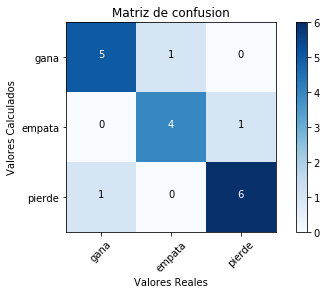

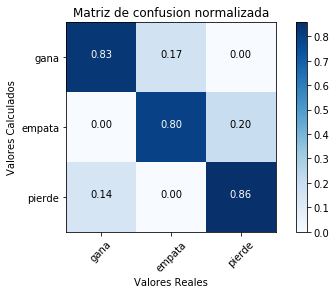

In [597]:
def conf_matr(values, y, y2):
    mat = np.zeros((3,3), dtype=int)
    for i in range(len(y)):
        mat[y[i]][y2[i]]+=1    
    names=['gana', 'empata', 'pierde']
    mpl.figure()
    plot_confusion_matrix(mat, classes=names,
                          title='Matriz de confusion')
    mpl.figure()
    plot_confusion_matrix(matriz, classes=names, normalize=True,
                          title='Matriz de confusion normalizada')
    
conf_matr([0,1,2], y, y_values_calc)